В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import  matplotlib.pyplot as plt
import seaborn as sns

# 1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [ ]:
fetch_california_housing=datasets.fetch_california_housing()
fetch_california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
print(fetch_california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Целевой переменной является медианная стоимость дома в округах Калифорнии. Выражены в сотнях тысяч долларов (100 000 долларов США).


Признаки:

MedInc- средний доход в блок-группе

HouseAge- средний возраст дома в блочной группе

AveRooms- среднее количество комнат на домохозяйство     

AveBedrms- среднее количество спален на домохозяйство

Population- блок групповое население

AveOccup- среднее количество членов домохозяйства

Latitude- широта

Longitude - долгота


Домашнее хозяйство - это группа людей, проживающих в одном доме. Поскольку среднее количество комнат и спален в этом наборе данных указано на домохозяйство, эти столбцы могут принимать чрезвычайно большие значения для групп блоков с небольшим количеством домохозяйств и большим количеством пустующих домов, таких как курорты для отдыха.

Блочная группа - это наименьшая географическая единица, для которой Бюро переписи населения США публикует выборочные данные (население блочной группы обычно составляет от 600 до 3000 человек).

In [ ]:
fetch_california_housing.target_names

['MedHouseVal']

In [ ]:
data = pd.DataFrame(fetch_california_housing.data, columns=fetch_california_housing.feature_names)
data['MedHouseVal'] = fetch_california_housing.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2.Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# 3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое. 4.Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [ ]:
X = data[data.columns[:-1]]
Y = data['MedHouseVal']

In [ ]:
def getMetrics(X, Y, random_seed=42, model=None, test_size=0.2):
    if model is None:
        model = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
    r2_train = r2_score(Y_train, Y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
    r2_test = r2_score(Y_test, Y_pred_test)
    r2= []
    r2.extend([r2_train,r2_test])
    rmse=[]
    rmse.extend([rmse_train,rmse_test])
    return rmse, r2

In [ ]:
df=pd.DataFrame(
    getMetrics(X, Y),
    columns=['Train', 'Test'], index=['rmse (стр.к 0)', 'r2 (стр.к 1)']
)
df1=df.T
df1.columns = pd.MultiIndex.from_tuples(
    zip(['model', 'model'],
        df1.columns))
df1 # модель на полных данных

model             
      rmse (стр.к 0) r2 (стр.к 1)
Train       0.719676     0.612551
Test        0.745581     0.575788

# 5.Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

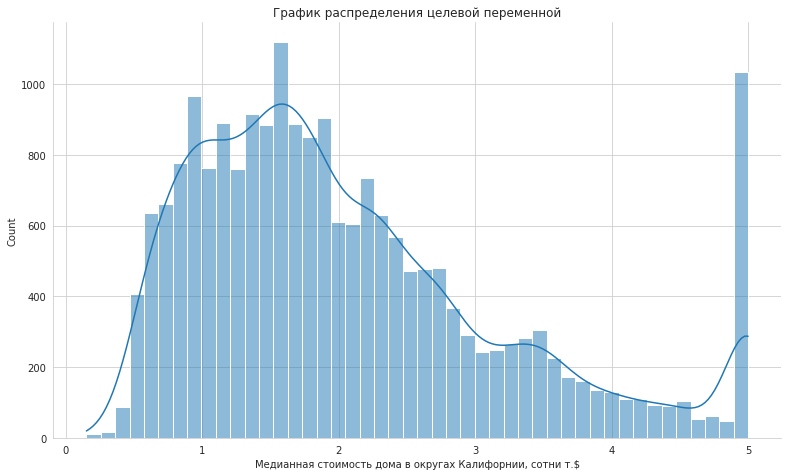

In [ ]:
ax=sns.displot(data=data, x="MedHouseVal", kde=True, height=6.5, aspect=1.7).set(xlabel='Медианная стоимость дома в округах Калифорнии, сотни т.$', title='График распределения целевой переменной');

In [ ]:
data.describe()['MedHouseVal']

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

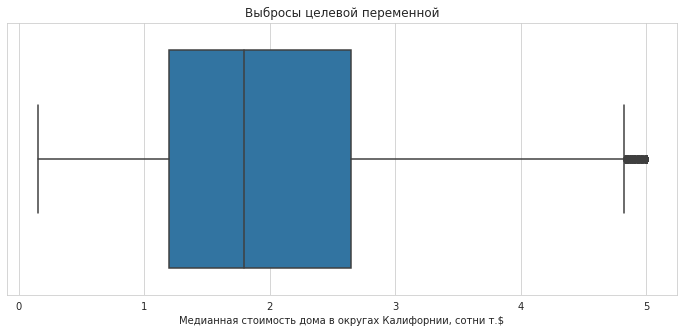

In [ ]:
sns.set_style('whitegrid')
f,ax=plt.subplots(figsize=(12,5))
ax=sns.boxplot(x='MedHouseVal', data=data).set(xlabel='Медианная стоимость дома в округах Калифорнии, сотни т.$', title='Выбросы целевой переменной');

In [ ]:
data[data['MedHouseVal'] > 4.7]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


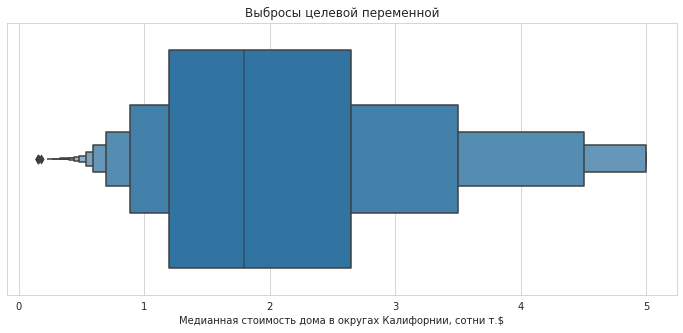

In [ ]:
sns.set_style('whitegrid')
f,ax=plt.subplots(figsize=(12,5))
ax=sns.boxenplot(x='MedHouseVal', data=data).set(xlabel='Медианная стоимость дома в округах Калифорнии, сотни т.$', title='Выбросы целевой переменной');

In [ ]:
q1 = data['MedHouseVal'].quantile(0.25)
q3 = data['MedHouseVal'].quantile(0.75)

iqr = q3 - q1

lower_bound = data['MedHouseVal'].min(axis=0)
upper_bound = q3 + (1.5 * iqr)

lower_bound, upper_bound

(0.14999, 4.824124999999999)

In [ ]:
data_ = data.drop(data[~data['MedHouseVal'].between(lower_bound, upper_bound, inclusive=True)].index)
data_.shape[0] / data.shape[0]

<ipython-input-62-3094e50ae9de>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  data_ = data.drop(data[~data['MedHouseVal'].between(lower_bound, upper_bound, inclusive=True)].index)


0.948110465116279

Процент выбросов был небольшой - оставшаяся выборка составляет 94.8 % исходной.

In [ ]:
X_ = data_[data_.columns[:-1]]
Y_ = data_['MedHouseVal']

In [ ]:
df_=pd.DataFrame( # модель с удалением выбросов целевой переменной
    getMetrics(X_, Y_),
    columns=['Train', 'Test'], index=['rmse (стр.к 0)', 'r2 (стр.к 1)']
)
df1_=df_.T
df1_.columns = pd.MultiIndex.from_tuples(
    zip(['model_', 'model_'],
        df1_.columns))
df_concat = pd.concat([df1, df1_], axis=1)
df_concat

model                      model_             
      rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1)
Train       0.719676     0.612551       0.627334     0.566240
Test        0.745581     0.575788       0.607259     0.601259

После удаления выбросов целевой переменной у модели:

- улучшилась метрика RMSE на обучении и на тесте;

- улучшилась метрика R2 на тесте, но ухудшилась на обучении

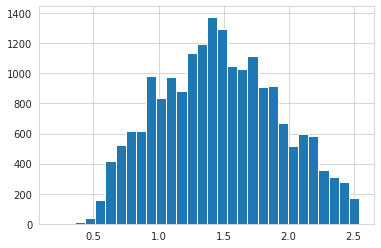

In [ ]:
np.log2(abs(data_['MedHouseVal'])+1).hist(bins=30);

Хорошо бы ещё сразу нормализовать распределение целевой переменной. Но в этапах работ математическое преобразование указано в 8 пункте, поэтому буду делать позже.

# 6.Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

## Визуализация

<Figure size 792x576 with 0 Axes>

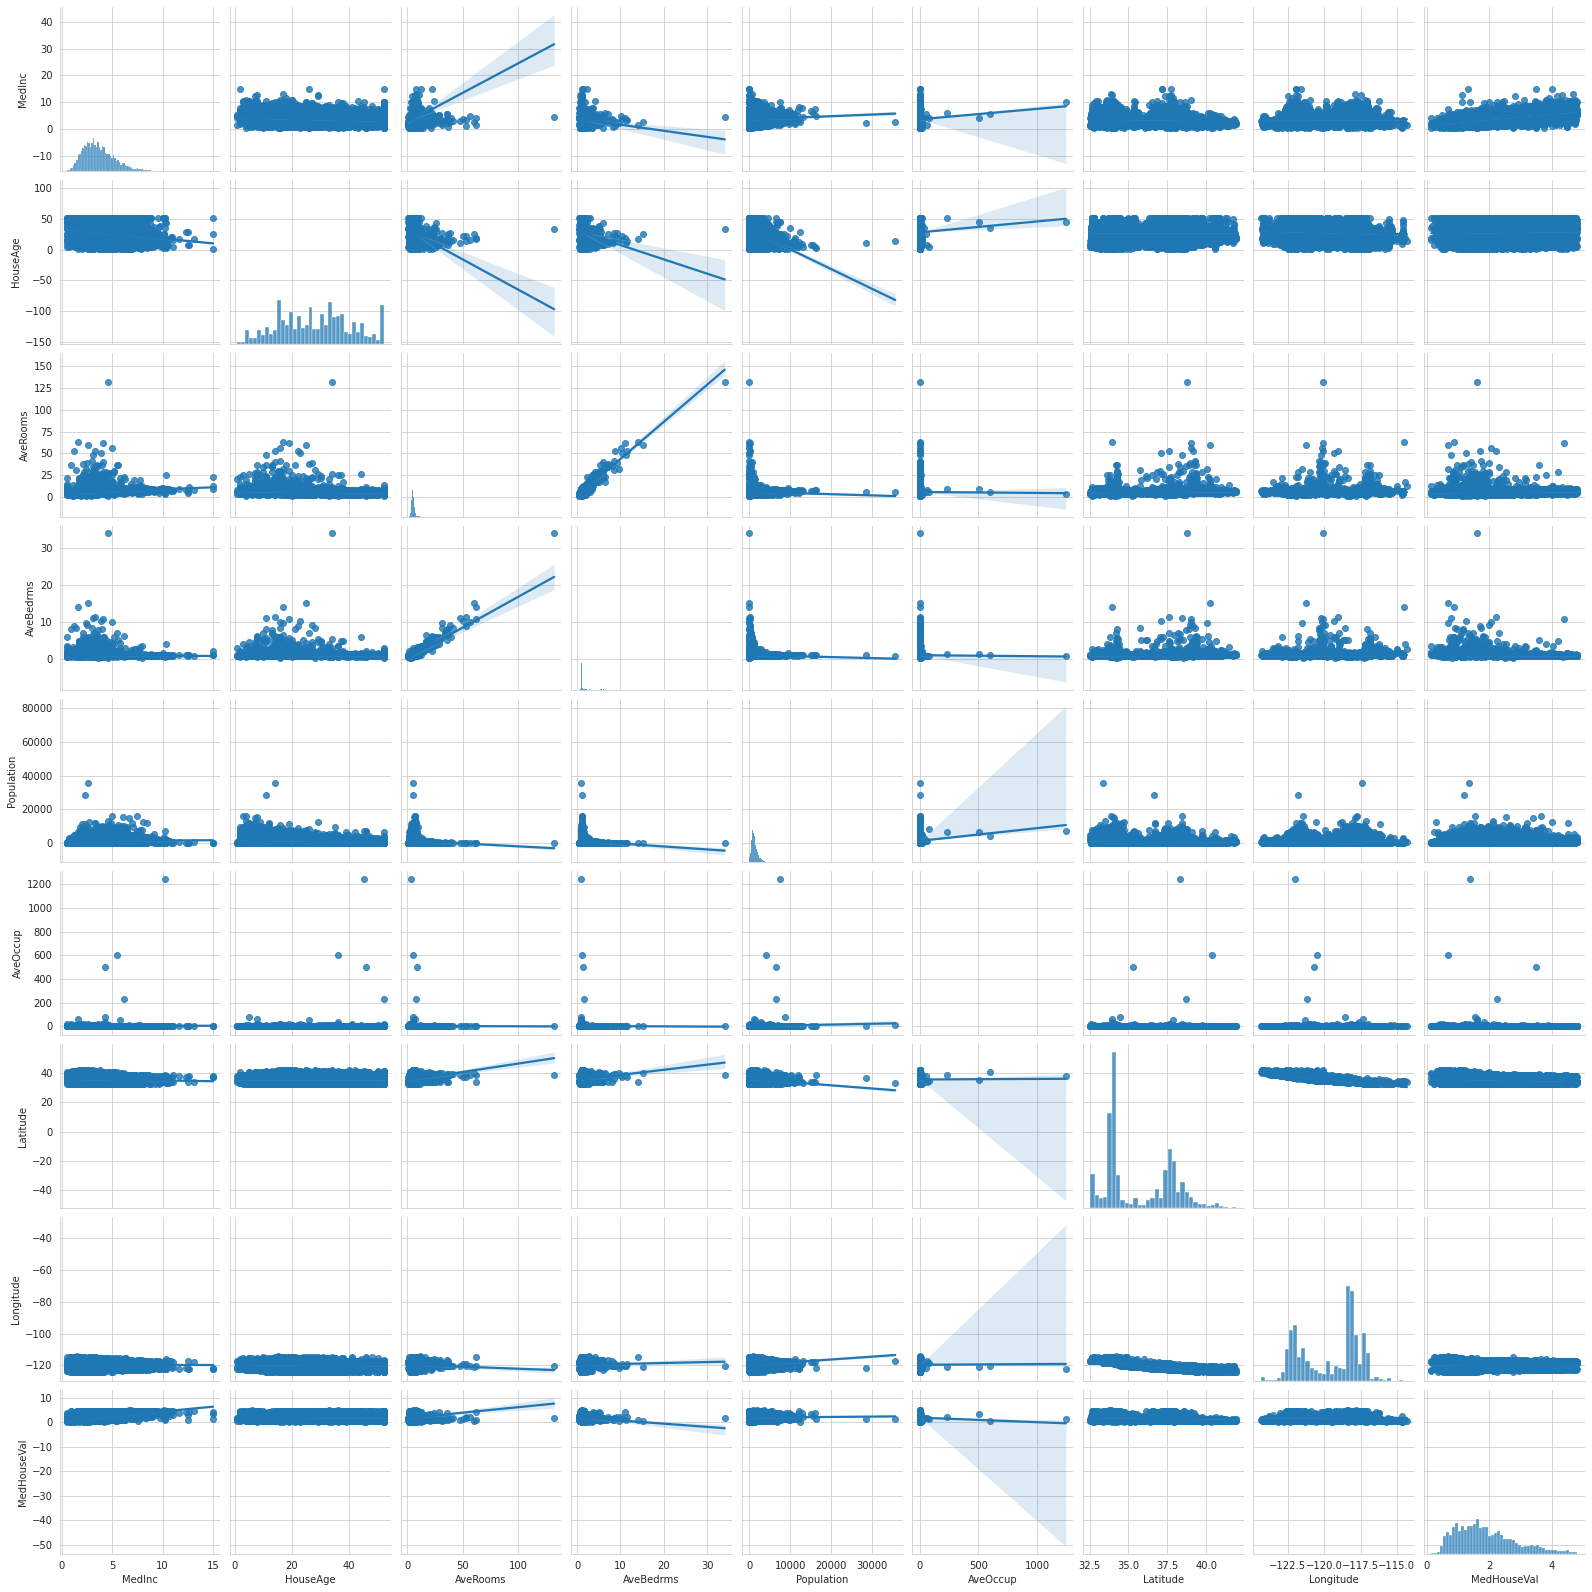

In [ ]:
plt.figure(figsize=(11, 8))
sns.pairplot(data_, kind='reg');

## Корреляционная матрица

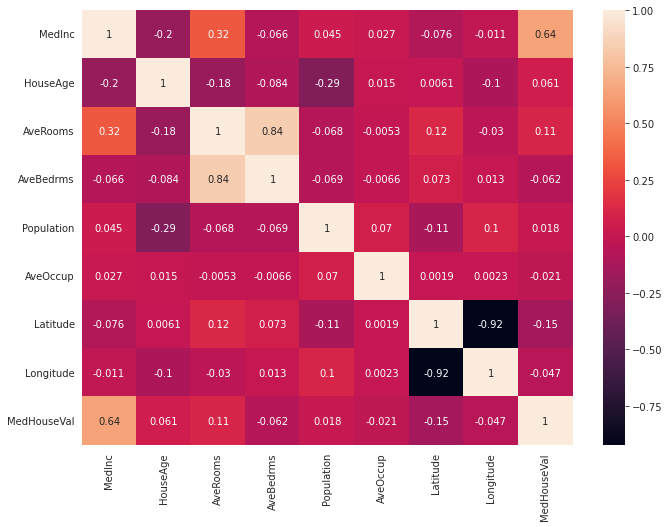

In [ ]:
corr_ = data_.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(corr_, annot=True);

Из корреляционной матрицы (коэф.Пирмана) видно, что в целом линейная связь между признаками слабая.

Много обратных связей.

Но при этом есть и сильно коррелированные признаки

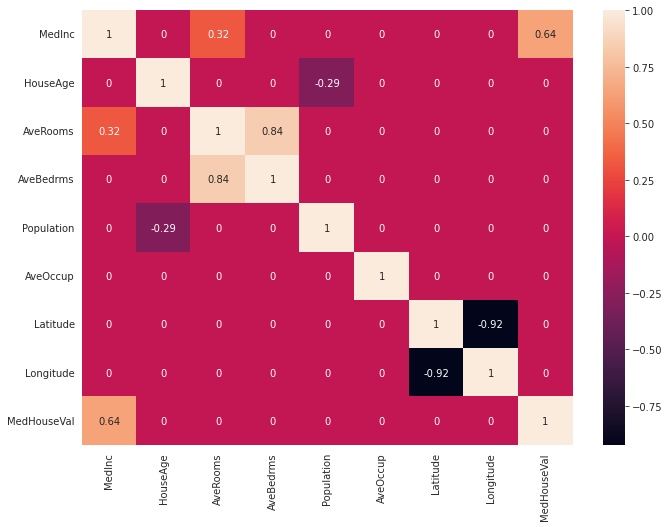

In [ ]:
corr_[np.abs(corr_) < 0.2] = 0 # обнулим совсем слабые связи
plt.figure(figsize=(11, 8))
sns.heatmap(corr_, annot=True);

## a. Сделайте выводы.

Очень сильная отрицательная связь между долготой и широтой.

Очень сильная связь между количеством спален и количеством комнат в доме - чем больше комнат, тем больше спален.

Крепкая связь между стоимостью дома и средним доходом - чем выше стоимость, тем выше доход.

Умеренная отрицательная связь между населением района (блок-группы) и средним возрастом дома в районе - чем старее дома, тем меньше населения в районе.


Умеренная связь между количеством комнат и средним доходом населения в районе.



Выводы:

Можно удалить признак 'AveOccup' с незначительной связью.

Из пары сильно коррелированных признаков Latitude-Longitude	удалим Longitude.

Из пары сильно коррелированных признаков AveRooms-AveBedrms	удалим AveRooms.

## b. Удалите признаки на основании полученных значений, выводов.

In [ ]:
data_1=data_.drop(['AveOccup','AveRooms','Longitude'], axis=1)
data_1.head()

,MedInc,HouseAge,AveBedrms,Population,Latitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,37.88,4.526
1,8.3014,21.0,0.971880,2401.0,37.86,3.585
2,7.2574,52.0,1.073446,496.0,37.85,3.521
3,5.6431,52.0,1.073059,558.0,37.85,3.413
4,3.8462,52.0,1.081081,565.0,37.85,3.422


## c. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
X_1 = data_1[data_1.columns[:-1]]
Y_1 = data_1['MedHouseVal']

In [ ]:
df_1=pd.DataFrame( # модель с удалением признаков на основе корреляции
    getMetrics(X_1, Y_1),
    columns=['Train', 'Test'], index=['rmse (стр.к 0)', 'r2 (стр.к 1)']
)
df1_1=df_1.T
df1_1.columns = pd.MultiIndex.from_tuples(
    zip(['model_1', 'model_1'],
        df1_1.columns))
df_concat = pd.concat([df1_, df1_1], axis=1)
df_concat

model_                     model_1             
      rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1)
Train       0.627334     0.566240       0.701728     0.457263
Test        0.607259     0.601259       0.689184     0.486414

После удаления трёх признаков у модели:

- ухудшилась метрика RMSE на обучении и на тесте;

- ухудшилась метрика R2 на обучении и на тесте.



Изменим эту модель, будем удалять только признак с незначительной связью.

In [ ]:
data_1=data_.drop(['AveOccup'], axis=1)
data_1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,37.85,-122.25,3.422


In [ ]:
X_1 = data_1[data_1.columns[:-1]]
Y_1 = data_1['MedHouseVal']

In [ ]:
df_1=pd.DataFrame( # модель с удалением признаков на основе корреляции
    getMetrics(X_1, Y_1),
    columns=['Train', 'Test'], index=['rmse (стр.к 0)', 'r2 (стр.к 1)']
)
df1_1=df_1.T
df1_1.columns = pd.MultiIndex.from_tuples(
    zip(['model_1', 'model_1'],
        df1_1.columns))
df_concat = pd.concat([df1_, df1_1], axis=1)
df_concat

model_                     model_1             
      rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1)
Train       0.627334     0.566240       0.628670     0.564391
Test        0.607259     0.601259       0.606922     0.601702

После удаления одного признака у модели:

- незначительно улучшилась метрика RMSE на тесте, ухудшилась на обучении;

- незначительно улучшилась метрика R2 на тесте, ухудшилась на обучении.


# 7.Исследуйте оставленные признаки на выбросы.


Для поиска выбросов будем использовать boxplot

In [ ]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass

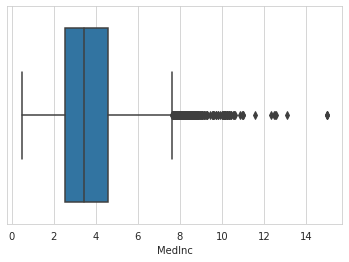

In [ ]:
get_boxplot(data_1, columns = ['MedInc'])

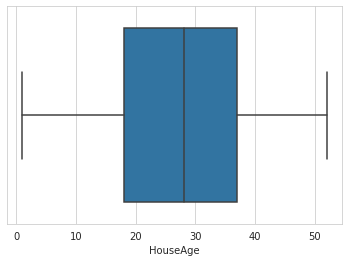

In [ ]:
get_boxplot(data_1, columns = ['HouseAge'])

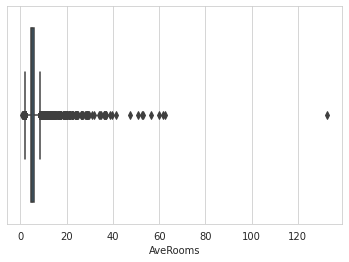

In [ ]:
get_boxplot(data_1, columns = ['AveRooms'])

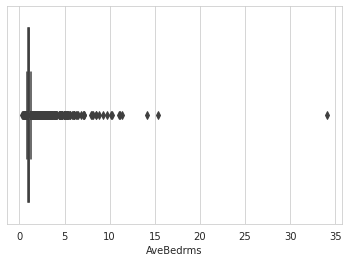

In [ ]:
get_boxplot(data_1, columns = ['AveBedrms'])

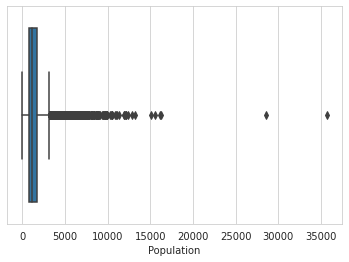

In [ ]:
get_boxplot(data_1, columns = ['Population'])

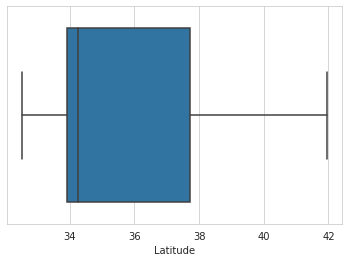

In [ ]:
get_boxplot(data_1, columns = ['Latitude'])

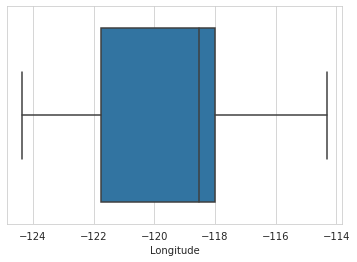

In [ ]:
get_boxplot(data_1, columns = ['Longitude'])

У четырёх признаков есть выбросы: доход, кол-во комнат, количество спален, население.

## a. Удалите выбросы в случае обнаружения.


In [ ]:
q1 = data_1['MedInc'].quantile(0.25)
q3 = data_1['MedInc'].quantile(0.75)
iqr = q3 - q1
lower_bound = data_1['MedInc'].min(axis=0)
upper_bound = q3 + (1.5 * iqr)
data_1 = data_1.drop(data_1[~data_1['MedInc'].between(lower_bound, upper_bound, inclusive=True)].index)

In [ ]:
q1 = data_1['AveRooms'].quantile(0.25)
q3 = data_1['AveRooms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_1 = data_1.drop(data_1[~data_1['AveRooms'].between(lower_bound, upper_bound, inclusive=True)].index)

In [ ]:
q1 = data_1['AveBedrms'].quantile(0.25)
q3 = data_1['AveBedrms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_1 = data_1.drop(data_1[~data_1['AveBedrms'].between(lower_bound, upper_bound, inclusive=True)].index)

In [ ]:
q1 = data_1['Population'].quantile(0.25)
q3 = data_1['Population'].quantile(0.75)
iqr = q3 - q1
lower_bound = data_1['Population'].min(axis=0)
upper_bound = q3 + (1.5 * iqr)
data_1 = data_1.drop(data_1[~data_1['Population'].between(lower_bound, upper_bound, inclusive=True)].index)

## b. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
X_2 = data_1[data_1.columns[:-1]]
Y_2 = data_1['MedHouseVal']

In [ ]:
df_2=pd.DataFrame( # модель с удалением всех выбросов
    getMetrics(X_2, Y_2),
    columns=['Train', 'Test'], index=['rmse (стр.к 0)', 'r2 (стр.к 1)']
)
df1_2=df_2.T
df1_2.columns = pd.MultiIndex.from_tuples(
    zip(['model_2', 'model_2'],
        df1_2.columns))
df_concat = pd.concat([df1_1, df1_2], axis=1)
df_concat

model_1                     model_2             
      rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1)
Train       0.628670     0.564391       0.600909     0.577666
Test        0.606922     0.601702       0.623677     0.559846

После удаления всех выбросов у признаков у модели:

- незначительно улучшилась метрика RMSE на обучении, ухудшилась на тесте;

- незначительно улучшилась метрика R2 на обучении, ухудшилась на тесте.


# 8.Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.


In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

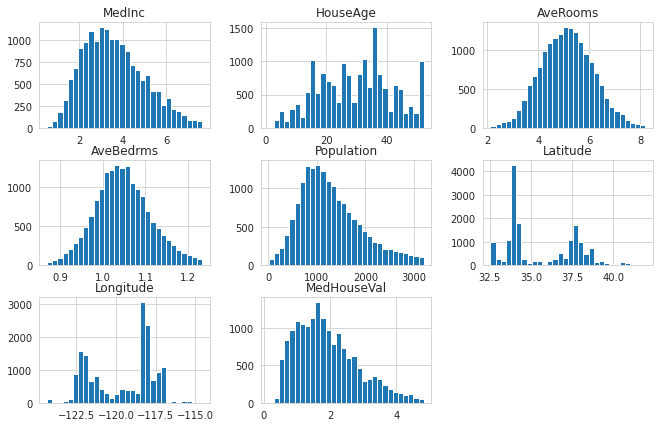

In [ ]:
data_1.hist(bins=30);

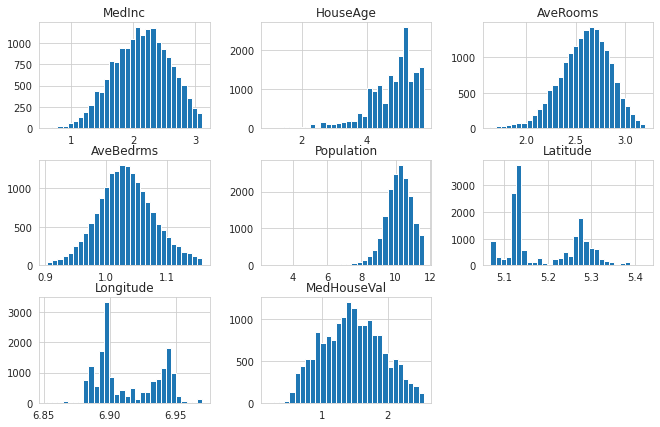

In [ ]:
np.log2(abs(data_1)+1).hist(bins=30);

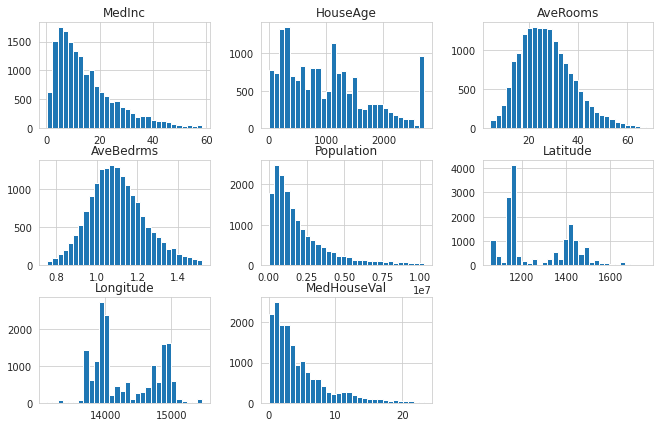

In [ ]:
np.square(data_1).hist(bins=30);

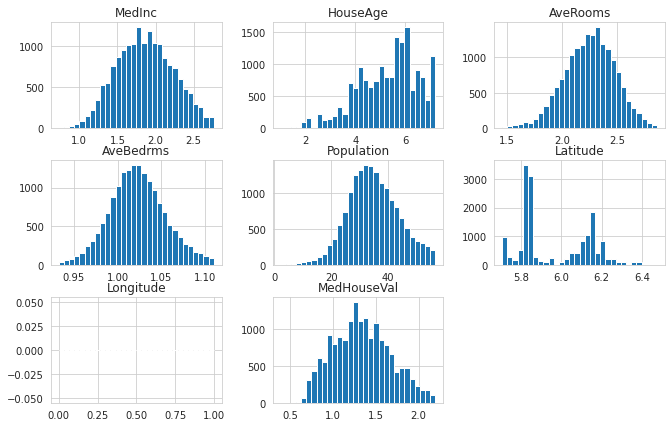

In [ ]:
np.sqrt(data_1).hist(bins=30);

In [ ]:
data_1[['MedHouseVal', 'AveBedrms']]=np.log2(abs(data_1[['MedHouseVal', 'AveBedrms']])+1)
data_1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal
3,5.6431,52.0,5.817352,1.051761,558.0,37.85,-122.25,2.141760
4,3.8462,52.0,6.281853,1.057333,565.0,37.85,-122.25,2.144699
5,4.0368,52.0,4.761658,1.072879,413.0,37.85,-122.25,1.886355
6,3.6591,52.0,4.931907,0.964481,1094.0,37.84,-122.25,1.997112
7,3.1200,52.0,4.797527,1.043921,1157.0,37.84,-122.25,1.771463


In [ ]:
data_1[['Population', 'MedInc']]=np.sqrt(data_1[['Population', 'MedInc']])
data_1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal
3,2.375521,52.0,5.817352,1.051761,23.622024,37.85,-122.25,2.141760
4,1.961173,52.0,6.281853,1.057333,23.769729,37.85,-122.25,2.144699
5,2.009179,52.0,4.761658,1.072879,20.322401,37.85,-122.25,1.886355
6,1.912877,52.0,4.931907,0.964481,33.075671,37.84,-122.25,1.997112
7,1.766352,52.0,4.797527,1.043921,34.014703,37.84,-122.25,1.771463


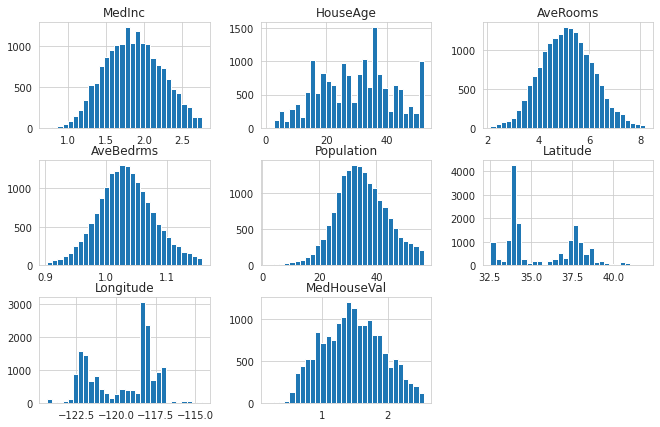

In [ ]:
data_1.hist(bins=30);

## a. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
X_3 = data_1[data_1.columns[:-1]]
Y_3 = data_1['MedHouseVal']

In [ ]:
df_3=pd.DataFrame( # модель с математическим преобразованием признаков
    getMetrics(X_3, Y_3),
    columns=['Train', 'Test'], index=['rmse (стр.к 0)', 'r2 (стр.к 1)']
)
df1_3=df_3.T
df1_3.columns = pd.MultiIndex.from_tuples(
    zip(['model_3', 'model_3'],
        df1_3.columns))
df_concat = pd.concat([df1_2, df1_3], axis=1)
df_concat

model_2                     model_3             
      rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1)
Train       0.600909     0.577666       0.279237     0.618151
Test        0.623677     0.559846       0.289495     0.598396

После математического преобразования некоторых признаков у модели:

- значительно улучшилась метрика RMSE на обучении и на тесте;

- незначительно улучшилась метрика R2 на обучении и на тесте.


## Попробуем ещё улучшить метрики другими способами

### Создаём районы

In [ ]:
from sklearn.cluster import DBSCAN, KMeans

In [ ]:
len(data_1['Population'].unique())

2877

In [ ]:
data_1['Population'].unique()

array([23.62202362, 23.76972865, 20.32240143, ..., 55.31726674,
       15.42724862, 52.02883816])

In [ ]:
kmeans = KMeans(n_clusters=2877)
cluster = kmeans.fit_predict(data_1[['Latitude', 'Longitude']])

In [ ]:
data_1['cluster'] = cluster
data_1.head(15)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal,cluster
3,2.375521,52.0,5.817352,1.051761,23.622024,37.85,-122.25,2.141760,1700
4,1.961173,52.0,6.281853,1.057333,23.769729,37.85,-122.25,2.144699,1700
5,2.009179,52.0,4.761658,1.072879,20.322401,37.85,-122.25,1.886355,1700
6,1.912877,52.0,4.931907,0.964481,33.075671,37.84,-122.25,1.997112,795
7,1.766352,52.0,4.797527,1.043921,34.014703,37.84,-122.25,1.771463,795
8,1.442359,42.0,4.294118,1.082462,34.727511,37.84,-122.26,1.707966,480
9,1.921250,52.0,4.970588,0.992911,39.382737,37.84,-122.25,1.852398,795
10,1.789721,52.0,5.477612,1.056307,30.166206,37.85,-122.26,1.931683,480
11,1.808452,52.0,4.772480,1.017582,38.781439,37.85,-122.26,1.773152,480
12,1.753568,52.0,5.322650,1.009219,33.136083,37.85,-122.26,1.648465,480


### Повторяем п. 3, п. 4 на измененных данных.

In [ ]:
X_4 = data_1[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','Population', 'Latitude', 'Longitude','cluster']]
Y_4 = data_1['MedHouseVal']

In [ ]:
df_4=pd.DataFrame( # модель с кластеризацией широты и долготы
    getMetrics(X_4, Y_4),
    columns=['Train', 'Test'], index=['rmse (стр.к 0)', 'r2 (стр.к 1)']
)
df1_4=df_4.T
df1_4.columns = pd.MultiIndex.from_tuples(
    zip(['model_4', 'model_4'],
        df1_4.columns))
df_concat = pd.concat([df1_3, df1_4], axis=1)
df_concat

model_3                     model_4             
      rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1)
Train       0.279237     0.618151       0.279170     0.618335
Test        0.289495     0.598396       0.289256     0.599059

После добавления нового признака с кластеризацией по широте и долготе у модели:

- незначительно улучшилась метрика RMSE на обучении и на тесте;

- незначительно улучшилась метрика R2 на обучении и на тесте.


# 9.Сформулируйте выводы по проделанной работе.

## a. Кратко опишите какие преобразования были сделаны с данными.

1. Проанализирована целевая переменная на выбросы, выбросы удалены.

2. Проведен корреляционный анализ, удален один признак с минимальной связью.

3. Оставшиеся признаки проанализированы на выбросы, выбросы удалены.

4. Проведен визуальный анализ для выбора математического способа нормализации признаков.

5. Проведено математическое преобразование четырех признаков.

6. Добавлен новый признак на основе имеющихся гео признаков.

## b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

In [ ]:
df_concat = pd.concat([df1, df1_, df1_1, df1_2, df1_3, df1_4], axis=1)
df_concat

model                      model_                     model_1  \
      rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0)   
Train       0.719676     0.612551       0.627334     0.566240       0.628670   
Test        0.745581     0.575788       0.607259     0.601259       0.606922   

                          model_2                     model_3               \
      r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1) rmse (стр.к 0) r2 (стр.к 1)   
Train     0.564391       0.600909     0.577666       0.279237     0.618151   
Test      0.601702       0.623677     0.559846       0.289495     0.598396   

             model_4               
      rmse (стр.к 0) r2 (стр.к 1)  
Train       0.279170     0.618335  
Test        0.289256     0.599059

 Модели:

 model - модель для базового набора данных;

 model_ - модель с удалением выбросов целевой переменной 'MedHouseVal';

 model_1 - модель с удалением признака 'AveOccup' на основе корреляции;

 model_2 - модель с удалением выбросов у признаков 'MedInc', 'AveRooms', 'AveBedrms','Population';

 model_3 - модель с математическим преобразованием признаков 'MedInc', 'AveBedrms','Population', 'MedHouseVal';

 model_4 - модель с добавлением нового признака на основе кластеризации геопризнаков математическим преобразованием признаков 'Latitude', 'Longitude'.

## c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Преобразование данных может как ухудшить, так и улучшить качество модели.

Нужно пробовать и варьировать преобразования, чтобы добиться лучшего результата.

У последней модели удалось значительно улучшить метрику RMSE и немного улучшить метрику R2.